In [2]:
import numpy as np

In [1]:
import pandas as pd

C:\Users\KAMALA VERMA\AppData\Local\Temp\ipykernel_25032\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df_energy=pd.read_csv('ENB2012_data (1).csv')

In [6]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
data.head()

NameError: name 'data' is not defined

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

#libraries for modeling

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [10]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
df_energy.rename(columns={"X1": "Relative Compactness", "X2" :"Surface Area" ,"X3": "Wall Area","X4": "Roof Area", "X5":"Overall Height","X6" :"Orientation","X7": "Glazing Area","X8" : "Glazing Area Distribution","Y1": "Heating Load","Y2": "Cooling Load"},inplace=True)



df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [10]:
df_energy.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [11]:
df_energy.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

In [12]:
df_energy.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [13]:
df_energy[df_energy["Glazing Area"]==0].describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.000000,48.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.0,0.0,14.286458,19.706250
std,0.106827,88.960297,44.059438,45.614184,1.768519,1.129865,0.0,0.0,7.625241,8.134356
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.0,0.0,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.0,0.0,7.037500,12.047500
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.0,0.0,13.200000,18.980000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.0,0.0,19.747500,25.860000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.0,0.0,29.900000,39.440000


In [14]:
def box_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.boxplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Box Plot of {feat!r}")

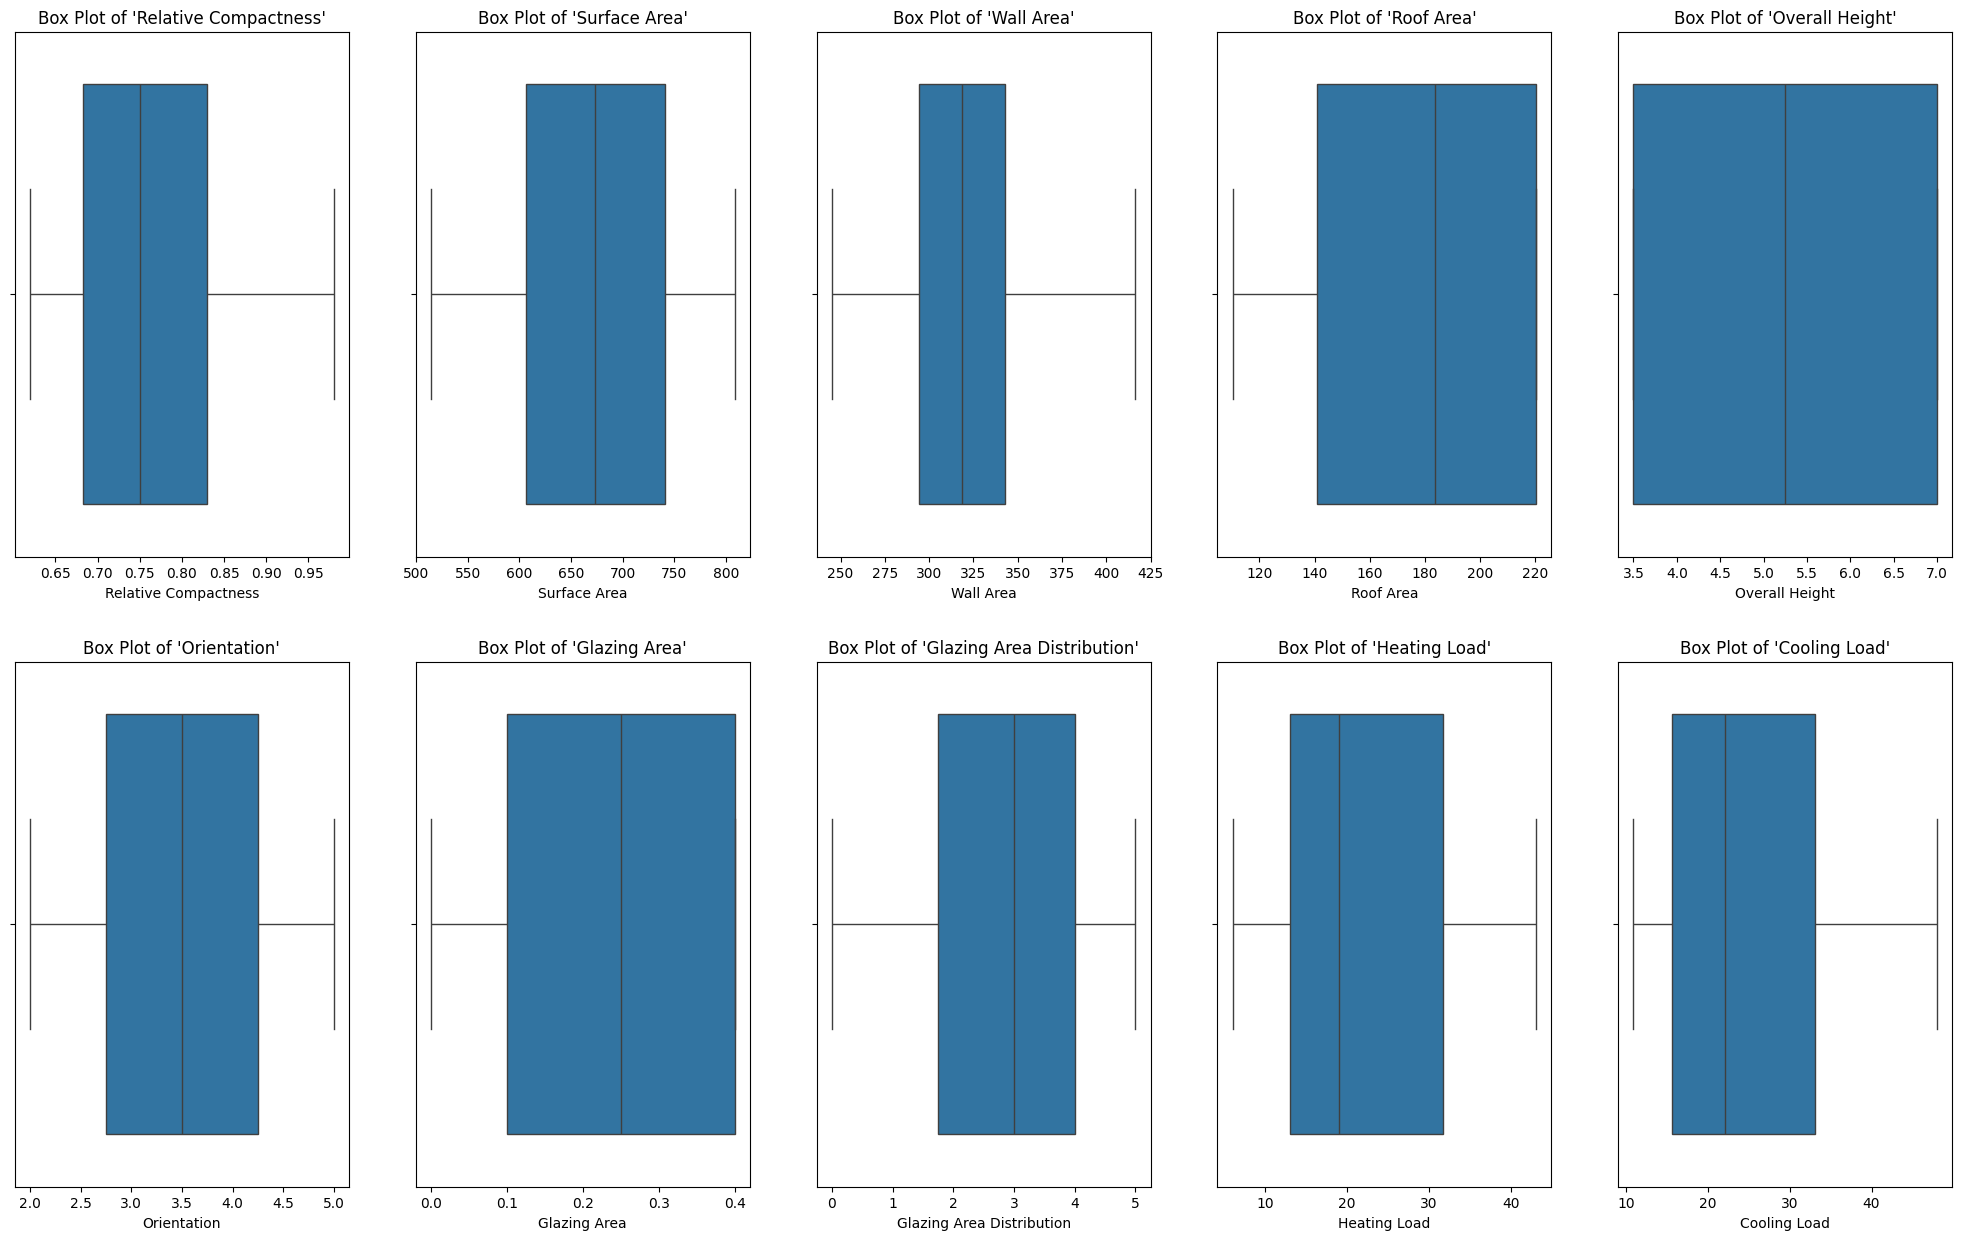

In [15]:
box_plots(data=df_energy,features=df_energy.columns,n_rows=2, n_cols=5, figsize=(25,15))


In [16]:
def Hist_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]
        
        sns.histplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Hist Plot of {feat!r}")

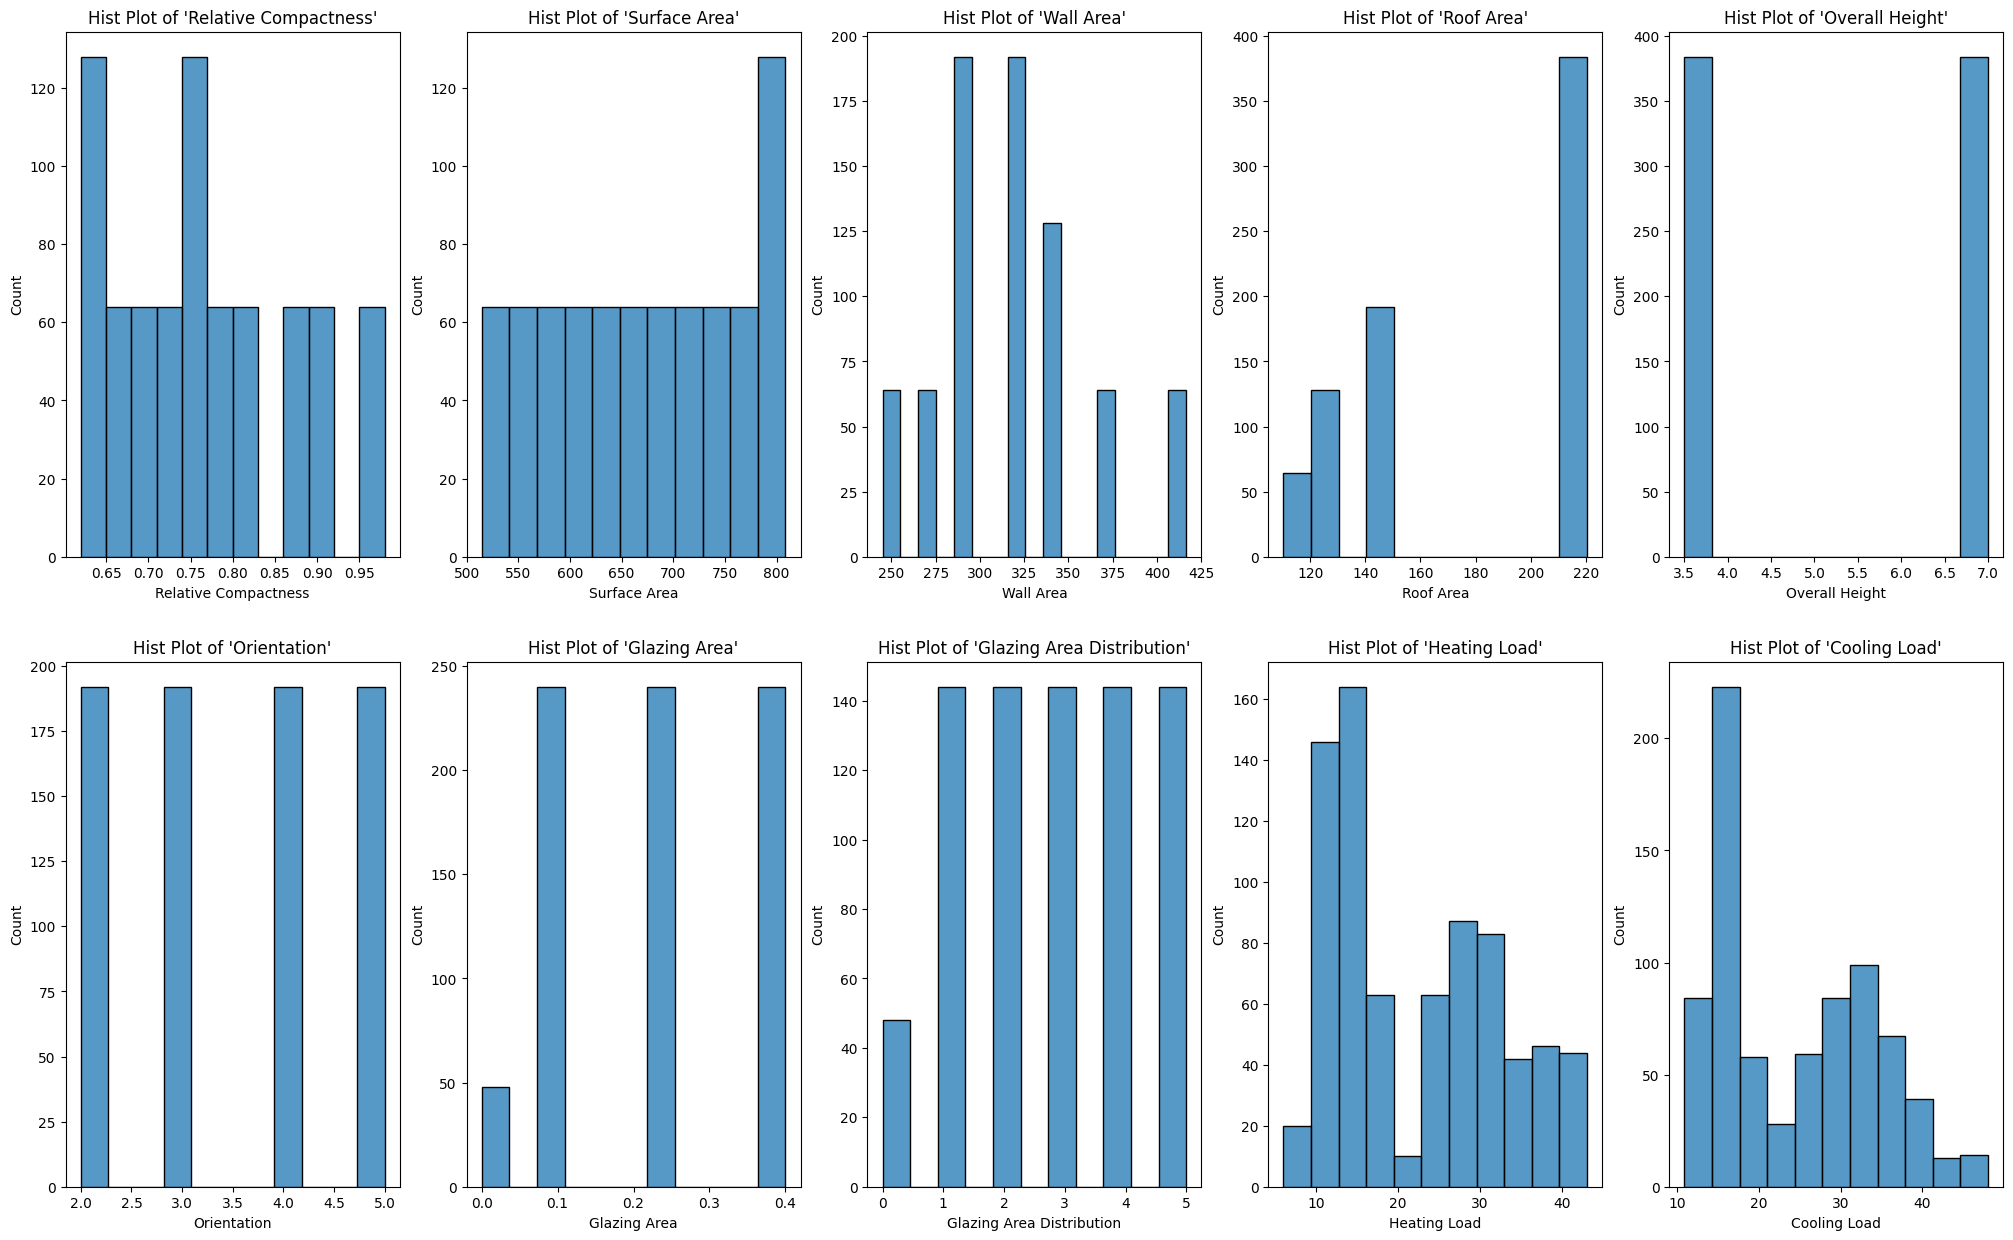

In [17]:
Hist_plots(data=df_energy,features=df_energy.columns,n_rows=2, n_cols=5, figsize=(25,15))

In [18]:
print("Skewness of Heating Load: %f" % data['Heating Load'].skew())
print("Skewness of Cooling Load: %f" % data['Cooling Load'].skew())

NameError: name 'data' is not defined

In [19]:
df_energy["Orientation"].value_counts(normalize=True)

Orientation
2    0.25
3    0.25
4    0.25
5    0.25
Name: proportion, dtype: float64

In [20]:
df_energy["Glazing Area Distribution"].value_counts(normalize=True)

Glazing Area Distribution
1    0.1875
2    0.1875
3    0.1875
4    0.1875
5    0.1875
0    0.0625
Name: proportion, dtype: float64

In [21]:
df_energy["Overall Height"].value_counts(normalize=True)

Overall Height
7.0    0.5
3.5    0.5
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Cooling Load Vs Overall Height')

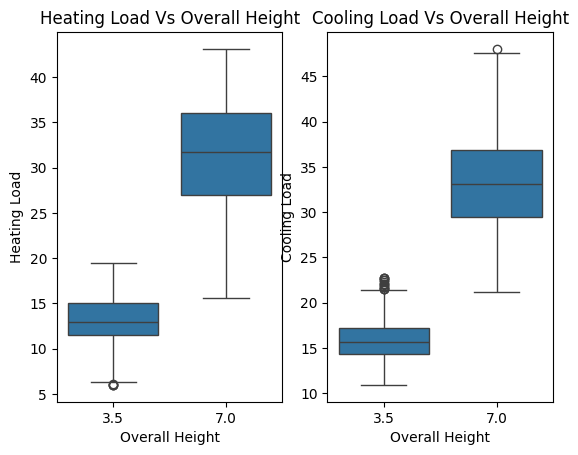

In [22]:

fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df_energy, x="Overall Height", y= "Heating Load", ax=ax[0])
ax[0].set_title("Heating Load Vs Overall Height") #set title for axis 0

sns.boxplot(data=df_energy, x="Overall Height", y="Cooling Load", ax=ax[1])
ax[1].set_title("Cooling Load Vs Overall Height") #set title for axis 1

<Figure size 1000x1000 with 0 Axes>

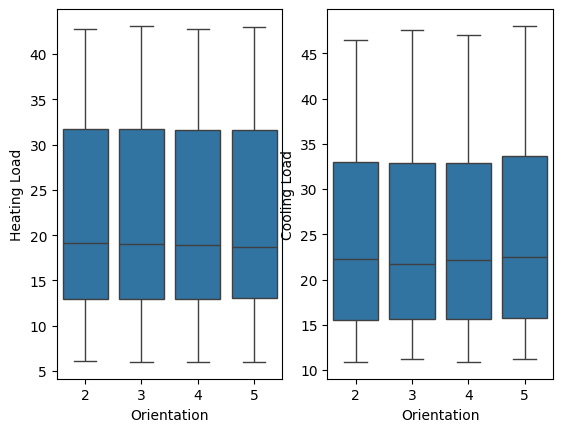

In [23]:
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df_energy, x="Orientation", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df_energy, x="Orientation", y="Cooling Load", ax=ax[1]);

In [24]:
df_energy.drop("Orientation", axis=1, inplace=True)

<Figure size 1000x1000 with 0 Axes>

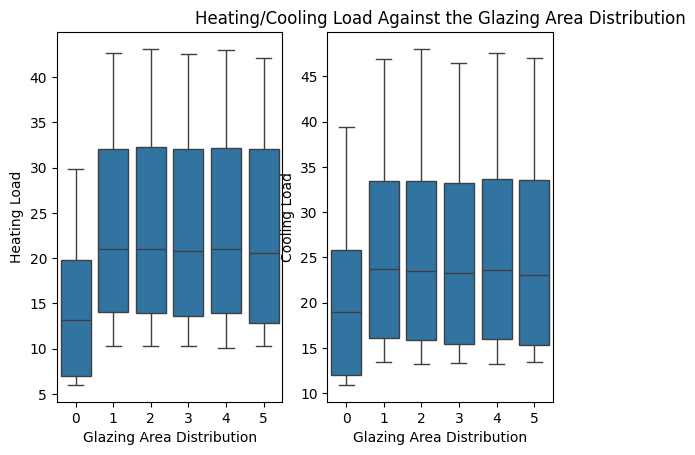

In [25]:
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y="Cooling Load", ax=ax[1])
plt.title("Heating/Cooling Load Against the Glazing Area Distribution");

In [26]:
df_energy["Glazing Area Distribution"].replace({0:0,1:1,2:1,3:1,4:1,5:1}, inplace=True)

C:\Users\KAMALA VERMA\AppData\Local\Temp\ipykernel_25032\323525796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy["Glazing Area Distribution"].replace({0:0,1:1,2:1,3:1,4:1,5:1}, inplace=True)


<Figure size 1000x1000 with 0 Axes>

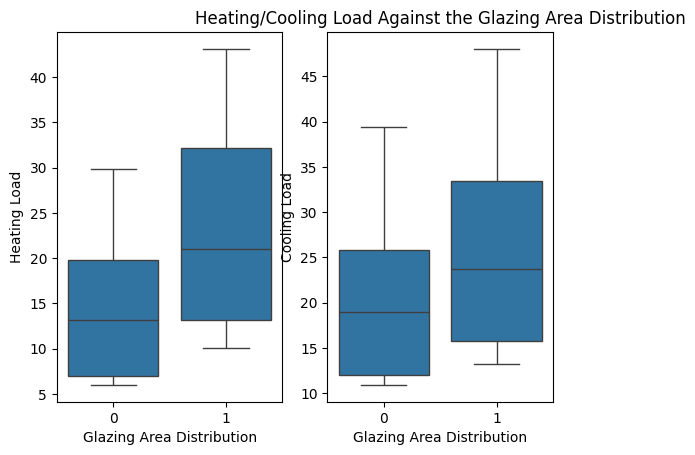

In [27]:
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y="Cooling Load", ax=ax[1])
plt.title("Heating/Cooling Load Against the Glazing Area Distribution");

In [28]:
def Scatter_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
    y
) -> "Plot":
    """This returns a box plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]
        
        sns.scatterplot(data=data, x=feat, ax=ax, y=y)
        
        slope, intercept = np.polyfit(data[feat], data[y], 1) #get the slope and intercept of the line

        line_of_best_fit = slope * data[feat] + intercept   #get the y vectors

        sns.lineplot(data, x=feat, y=line_of_best_fit, label="Line of best fit", ax=ax) #plot the line of best fit

        ax.set_title(f"Scatter Plot of {feat!r} vs {y}")

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


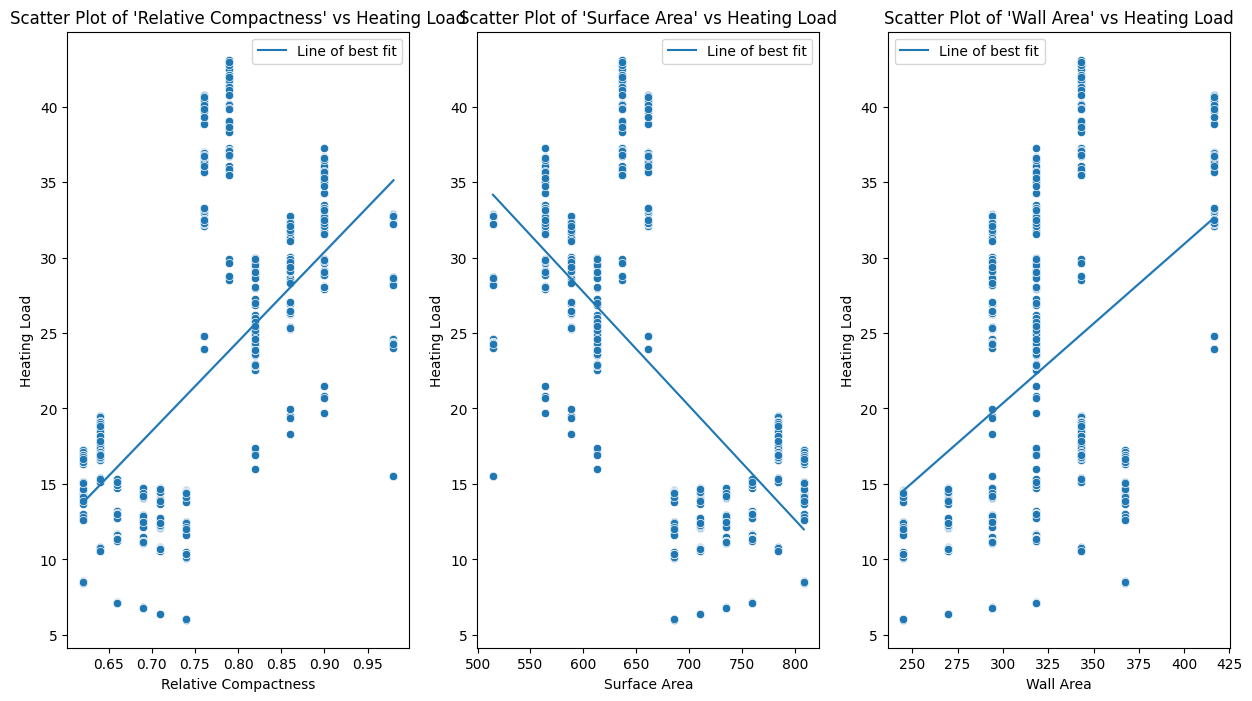

In [29]:
numerical_features=["Relative Compactness","Surface Area", "Wall Area"]
Scatter_plots(data=df_energy, features=numerical_features,n_rows=1,n_cols=3,y="Heating Load")


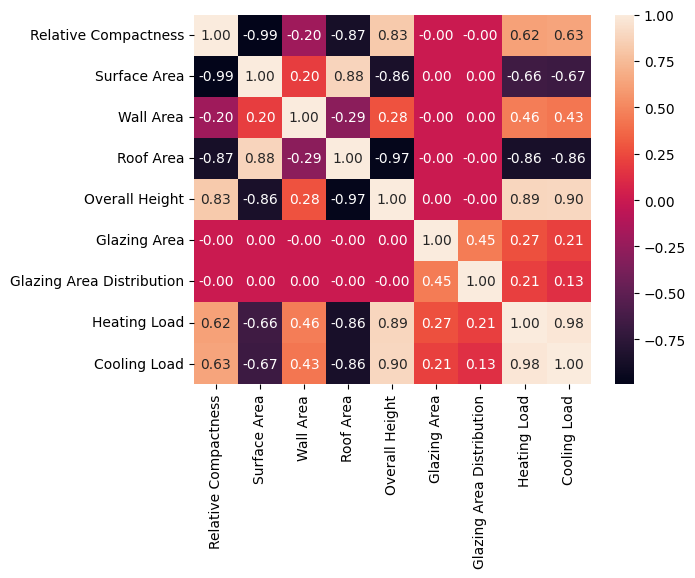

In [30]:
corr=df_energy.corr(method = 'pearson')
corr

#using heatmap to visulize the pearson correlation between variables
sns.heatmap(corr, annot=True,fmt=".2f");

In [31]:
df_energy.drop("Surface Area", inplace=True, axis=1)

In [32]:
TEST_SIZE=0.2    #test size of dataset
RANDOM_STATE=42
X=df_energy.drop(["Heating Load", "Cooling Load"], axis=1) #drop along the column
y=df_energy["Cooling Load"]   #subset the column Cooling Load

#split dataset into train and test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((614, 6), (154, 6))

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       614 non-null    float64
 1   Wall Area                  614 non-null    float64
 2   Roof Area                  614 non-null    float64
 3   Overall Height             614 non-null    float64
 4   Glazing Area               614 non-null    float64
 5   Glazing Area Distribution  614 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.6 KB


In [34]:
var_to_scale=X_train.select_dtypes(include=["float64", "int64"]).columns

In [35]:
scaler = MinMaxScaler()

#column transformer instantiation
col_transformer = ColumnTransformer(
    transformers=[ ("scaler", scaler, var_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 Index(['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height',
       'Glazing Area', 'Glazing Area Distribution'],
      dtype='object'))])

In [36]:
X_train_trans=col_transformer.fit_transform(X_train) 
X_test_trans=col_transformer.transform(X_test)   

In [37]:
X_train

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
60,0.82,318.5,147.00,7.0,0.10,1
618,0.64,343.0,220.50,3.5,0.40,1
346,0.86,294.0,147.00,7.0,0.25,1
294,0.90,318.5,122.50,7.0,0.25,1
231,0.66,318.5,220.50,3.5,0.10,1
...,...,...,...,...,...,...
71,0.76,416.5,122.50,7.0,0.10,1
106,0.86,294.0,147.00,7.0,0.10,1
270,0.71,269.5,220.50,3.5,0.10,1
435,0.98,294.0,110.25,7.0,0.25,1


In [38]:
df_train_trans=pd.DataFrame(data=X_train_trans, columns=X_train.columns)
df_train_trans

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.555556,0.428571,0.333333,1.0,0.250,1.0
1,0.055556,0.571429,1.000000,0.0,1.000,1.0
2,0.666667,0.285714,0.333333,1.0,0.625,1.0
3,0.777778,0.428571,0.111111,1.0,0.625,1.0
4,0.111111,0.428571,1.000000,0.0,0.250,1.0
...,...,...,...,...,...,...
609,0.388889,1.000000,0.111111,1.0,0.250,1.0
610,0.666667,0.285714,0.333333,1.0,0.250,1.0
611,0.250000,0.142857,1.000000,0.0,0.250,1.0
612,1.000000,0.285714,0.000000,1.0,0.625,1.0


In [39]:
#baseline model
import numpy as np

def zero_rule_algorithm_regression(y_train, y_test):
    '''A function to calculate the prediction from a baseline model using its mean
    Params:
    y_train (pd.Dataframe): Take the target train values as input
    
    Return
    The predicted values i.e mean of the target values.
    '''
    prediction=np.mean(y_train)
    y_pred=[prediction]*len(y_test)
    return y_pred

#perfromance metric function

def performance_metrics(y_pred, y_test):
    '''Function to calculate the MSE, RMSE and MSE '''
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=mean_squared_error(y_test,y_pred,squared=False)
    r2=r2_score(y_test,y_pred)
    
    return f"Mean Absoluete Error: {mae}\n Mean Square Error: {mse}\n Root Mean Sqaured Error: {rmse}\n R2: {r2} "

In [40]:
y_pred_baseline=zero_rule_algorithm_regression(y_train, y_test)

In [41]:
baseline_error_y=performance_metrics(y_pred_baseline, y_test)

print("Baseline Error for y:\n ", baseline_error_y)

Baseline Error for y:
  Mean Absoluete Error: 8.74185329328652
 Mean Square Error: 93.43635392999795
 Root Mean Sqaured Error: 9.666248182723116
 R2: -0.008408593861118474 


c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
#train and evaluate different regression models 
def train_and_evaluate_models(X_train,X_test, y_train, y_test):
    # Initialize different regression models
    models = [
        ("Linear Regression", LinearRegression()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("SVM", SVR()),  
        ("XGBoost", XGBRegressor()),
        ("K-Nearest Neighbors", KNeighborsRegressor())
    ]
    #Create lists to store the results
    model_names = []
    mse_values = []
    mae_values = []
    rmse_values=[]
    r2_values = []
    
    
    # Fit and evaluate each model
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse=mean_squared_error(y_test, y_pred)
        mae=mean_absolute_error(y_test, y_pred)
        rmse=mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        model_names.append(model_name)
        mse_values.append(mse)
        mae_values.append(mae)
        rmse_values.append(rmse)
        r2_values.append(r2)
        
        
    metrics_df=pd.DataFrame({
            'Model': model_names,
            'Mean Absolute Error': mae_values,
            'Root Mean Squared Error': rmse_values,
            'Mean Squared Error': mse_values,
            'R-squared (R2)': r2_values
        })
    return metrics_df


In [43]:
train_and_evaluate_models(X_train,X_test,y_train, y_test)

c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_reg

,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Linear Regression,2.187545,3.106592,9.650917,0.895843
1,Decision Tree,1.165358,1.748119,3.055920,0.967019
2,Random Forest,1.168717,1.752302,3.070563,0.966861
3,SVM,3.350358,4.650678,21.628810,0.766572
4,XGBoost,1.165082,1.747994,3.055482,0.967024
5,K-Nearest Neighbors,1.269883,2.046523,4.188258,0.954798


In [44]:
train_and_evaluate_models(X_train_trans,X_test_trans,y_train, y_test)

c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\KAMALA VERMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_reg

,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Linear Regression,2.187545,3.106592,9.650917,0.895843
1,Decision Tree,1.165358,1.748119,3.055920,0.967019
2,Random Forest,1.168773,1.749562,3.060966,0.966965
3,SVM,1.901710,3.120086,9.734940,0.894936
4,XGBoost,1.165082,1.747994,3.055482,0.967024
5,K-Nearest Neighbors,1.292195,2.141539,4.586189,0.950504


In [45]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# Get feature importance for Decision Tree
dt_feature_importance = dt_model.feature_importances_

# Create and fit a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importance for Random Forest
rf_feature_importance = rf_model.feature_importances_

# Create and fit an XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X, y)

# Get feature importance for XGBoost
xgb_feature_importance = xgb_model.feature_importances_

In [46]:
feat_import=pd.DataFrame(columns=X_train.columns, data=[dt_feature_importance,rf_feature_importance,xgb_feature_importance],index=["Decision Tree", "Random forest", "Xgboost"])
feat_import

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
Decision Tree,0.937209,0.010444,0.002017,0.000000,0.046957,0.003374
Random forest,0.532266,0.073977,0.110767,0.231496,0.047207,0.004289
Xgboost,0.885257,0.049188,0.000000,0.000000,0.065555,0.000000


C:\Users\KAMALA VERMA\AppData\Local\Temp\ipykernel_25032\1250176155.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size
C:\Users\KAMALA VERMA\AppData\Local\Temp\ipykernel_25032\1250176155.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size
C:\Users\KAMALA VERMA\AppData\Local\Temp\ipykernel_25032\1250176155.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size


<Figure size 1500x1000 with 0 Axes>

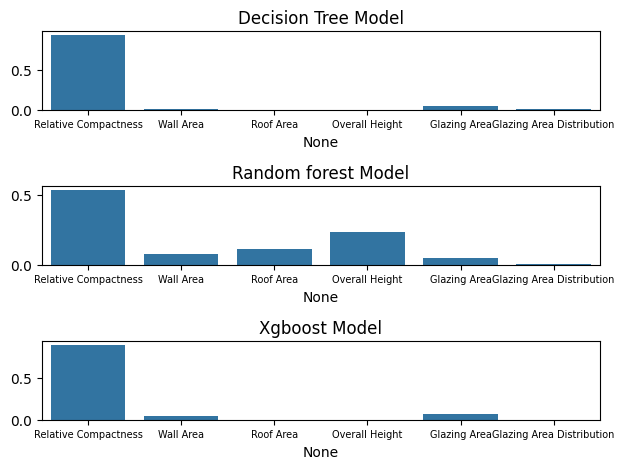

In [47]:
plt.figure(figsize=(15,10))
fig,ax=plt.subplots(nrows=3, ncols=1)
models=["Decision Tree", "Random forest", "Xgboost"]
feat_import=[dt_feature_importance,rf_feature_importance,xgb_feature_importance]
for i,model in enumerate(models):
    sns.barplot( y=feat_import[i], x=X_train.columns,ax=ax[i])
    ax[i].set_title(f"{model} Model")
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size
    
plt.tight_layout()

In [48]:
import pickle
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Save the Decision Tree model using pickle
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)


In [51]:

from flask import Flask, request, render_template
import pickle
from gevent.pywsgi import WSGIServer
from sklearn.tree import DecisionTreeRegressor

app = Flask(__name__)

# Load the Decision Tree model
try:
    with open('decision_tree_model.pkl', 'rb') as f:
        dt_model = pickle.load(f)
        if isinstance(dt_model, DecisionTreeRegressor):
            print("Model loaded successfully.")
        else:
            raise TypeError("Loaded model is not a DecisionTreeRegressor.")
except FileNotFoundError:
    print("Error: Could not find the model file 'decision_tree_model.pkl'. Please ensure the file exists.")
    dt_model = None
except Exception as e:
    print(f"Error occurred while loading the model: {e}")
    dt_model = None

# Define a route for your API endpoint
@app.route('/predict', methods=['POST'])
def predict():
    if dt_model is None:
        return render_template('error.html', message="Model not loaded.")
    
    # Get the input data from the request form
    X1 = float(request.form['X1'])
    X2 = float(request.form['X2'])
    X3 = float(request.form['X3'])
    X4 = float(request.form['X4'])
    X5 = float(request.form['X5'])
    X6 = int(request.form['X6'])
    
    # Make predictions using the model
    features = [[X1, X2, X3, X4, X5, X6]]
    predictions = dt_model.predict(features)
    
    # Render the template with predictions
    return render_template('result.html', predictions=predictions)

# Define a route for the root URL ("/")
@app.route('/', methods=['GET'])
def index():
    return render_template('index.html')

if __name__ == '__main__':
    # Debug/Development
    # app.run(debug=True, host="0.0.0.0", port="5000")
    # Production
    http_server = WSGIServer(('', 5000), app)
    http_server.serve_forever()

Model loaded successfully.


<gevent._socket3.socket at 0x209fc276dd0 object, fd=5796, family=23, type=1, proto=0>: (from ('::1', 52409, 0, 0)) Invalid HTTP method: '\x16\x03\x01\x02\x0c\x01\x00\x02\x08\x03\x03bJ7\x8eP\x95ú&\x89ÂmÝøç\r\x1eá\x8ey!\x0fK\x97ÜÈ\x91v\x8d\x9aú¤¼ ãäÄë¢\x8c[±\x84bâ\x8e!\x94t:ªÞ¡ä)5/\\ëÀM\x87¬w\x1c~\x00 zz\x13\x01\x13\x02\x13\x03À+À/À,À0Ì©Ì¨À\x13À\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x01\x9f\x9a\x9a\x00\x00\x00\n'
áy!KÜÈvú¤¼ ãäÄë¢[±bâ!t:ªÞ¡ä)5/\ëÀM¬w~  zzÀ+À/À,À0Ì©Ì¨ÀÀ   / 5    " 400 - 0.002029
<gevent._socket3.socket at 0x209fc276dd0 object, fd=5220, family=23, type=1, proto=0>: (from ('::1', 52410, 0, 0)) Invalid HTTP method: '\x16\x03\x01\x02,\x01\x00\x02(\x03\x03¸2\x82ü~¬\r dæµ|K\x13?\x08î8\x02+ã±X\x17wNébQR<\x82 uÝ>·¾\tzáó\x14\x88\x1f:\xa0vdl\x1fZÚ\x13I\x06ðRT¿\x0eí×ò\x08\x00 ÊÊ\x13\x01\x13\x02\x13\x03À+À/À,À0Ì©Ì¨À\x13À\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x01¿ºº\x00\x00\x00\n'
 dæµ|Kî8+ã±XwNébQR< uÝ>·¾	záó: vdlZÚIðRT¿í×  ÊÊÀ+À/À,À0Ì©Ì¨À

KeyboardInterrupt: 

In [50]:
pip install gevent


     ---------------------------------------- 0.0/43.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/43.1 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.1 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.1 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.1 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.1 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.1 kB ? eta -:--:--
     ------------------------------------ - 41.0/43.1 kB 140.3 kB/s eta 0:00:01
     ------------------------------------ - 41.0/43.1 kB 140.3 kB/s eta 0:00:01
     ------------------------------------ - 41.0/43.1 kB 140.3 kB/s eta 0:00:01
     ------------------------------------ - 41.0/43.1 kB 140.3 kB/s eta 0:00:01
     --------------------------------------- 43.1/43.1 kB 77.8 kB/s eta 0:00:00
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   -------------------

DEPRECATION: Loading egg at c:\users\kamala verma\appdata\local\programs\python\python312\lib\site-packages\mask_rcnn-2.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
